## Loss Functions

In this assignment, we will learn about loss functions. We will use a create a neural network and measure the model's performance using different loss functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense

pd.set_option('display.max_rows', 100)

In [2]:
housing = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/housing.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# housing.info()

We will use the dataset above to predict housing prices using various features about each house. Our first step is to check for missing data. 

In [5]:
# Answer below:
(housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)[lambda x: x>0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Remove columns that contain more than 30% of missing data. After removing those columns, remove the rows that contain at least one observation that is missing.

In [6]:
# Answer below:
missing_data = (housing.isnull().sum()/housing.isnull().count())[lambda x: x>0.3].index
housing = housing.drop(missing_data, 1)
housing.dropna(inplace=True)

In [7]:
(housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)[lambda x: x>0]

Series([], dtype: float64)

There are some categorical variables that contain numeric data and some that do not. Print the type of each column to first see whether there is an issue with misclassification of column type.

In [8]:
# Answer below:
numeric = housing.select_dtypes('number').copy()

numeric.shape

(1094, 38)

In [9]:
# for col in numeric.columns:
#   print(f'Value counts for {col}')
#   display(numeric[col].value_counts())

In [10]:
for col in numeric.columns:
  if (numeric[col].value_counts()/numeric[col].count()).max() > 0.9:
    housing.drop(col, 1, inplace=True)
    numeric.drop(col, 1, inplace=True)

In [11]:
numeric.shape

(1094, 31)

In [12]:
numeric_cate_cols = [col for col in numeric.columns if numeric[col].value_counts().shape[0] < 5]
numeric_cate_cols

['BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars']

In [13]:
categorical = housing.select_dtypes('O').copy()

categorical.shape

(1094, 38)

In [14]:
# for col in categorical.columns:
#   print(f'Value counts for {col}')
#   display(categorical[col].value_counts()/categorical[col].count())

In [15]:
for col in categorical.columns:
  if (categorical[col].value_counts()/categorical[col].count()).max() > 0.9:
    housing.drop(col, 1, inplace=True)
    categorical.drop(col, 1, inplace=True)

In [16]:
categorical.shape

(1094, 24)

We see that month sold and year sold are not variables that describe a feature of the house. While they do have relevance if we create a model containing a time series element, we will not include them here. Drop these columns. Also, remove the id column

In [17]:
# Answer below
housing = housing.drop(['Id', 'MoSold', 'YrSold'], 1)

Using the information about the column types, identify all the variables that will be converted into dummy variables. Include at least one numeric variable that you think should be converted as well.

In [18]:
# Answer below:
dummy_cols = list(categorical.columns) + numeric_cate_cols

Convert the columns you selected above into dummy variables

In [19]:
# Answer below:
housing_dummies = pd.get_dummies(housing, columns=dummy_cols, drop_first=True)

Split the data into train and test with 20% of data in test.

In [20]:
# Answer below
X = housing_dummies.drop('SalePrice', 1)
y = housing_dummies['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

Create a model with 5 layers. The first layer should be a dense layer that takes in the input, the last layer should be of size 1. You determine the remaining layer sizes.

Use a linear activation for the output layer.

In [23]:
# Answer below
def build_model(loss='mae', opt='adam'):
  model = Sequential()
  model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer=opt, loss=loss, metrics=['mse', 'mae'])
  # model.summary()
  return model


Compile the model with the RMSprop optimizer and mean square error loss. Use the MSE as a metric. Set batch size to 100 and epochs to 200. Fit the model and report the results.

In [24]:
mse_model = build_model(loss='mse', opt='rmsprop')

In [25]:
# Answer below:
history = mse_model.fit(X_train_scaled, y_train_log, epochs=200, batch_size=100, 
          validation_data=(X_test_scaled, y_test_log))

Epoch 1/200
9/9 [==============================] - 1s 58ms/step - loss: 106.7229 - mse: 106.7229 - mae: 10.0936 - val_loss: 3.9209 - val_mse: 3.9209 - val_mae: 1.8039
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 1.8105 - mse: 1.8105 - mae: 1.0641 - val_loss: 0.7160 - val_mse: 0.7160 - val_mae: 0.6575
Epoch 3/200
9/9 [==============================] - 0s 20ms/step - loss: 0.6937 - mse: 0.6937 - mae: 0.6727 - val_loss: 0.5441 - val_mse: 0.5441 - val_mae: 0.5672
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5337 - mse: 0.5337 - mae: 0.5844 - val_loss: 0.4667 - val_mse: 0.4667 - val_mae: 0.5312
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.8827 - mse: 0.8827 - mae: 0.7548 - val_loss: 0.6010 - val_mse: 0.6010 - val_mae: 0.6208
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5036 - mse: 0.5036 - mae: 0.5778 - val_loss: 0.7213 - val_mse: 0.7213 - val_mae: 0.7038
Epoch 7/200
9/9 [==========

In [26]:
mse_model.evaluate(X_test_scaled, y_test_log)

7/7 [==============================] - 0s 2ms/step - loss: 0.2436 - mse: 0.2436 - mae: 0.4028


[0.24358594417572021, 0.24358594417572021, 0.4028224050998688]

In [27]:
mse_df = pd.DataFrame(history.history)

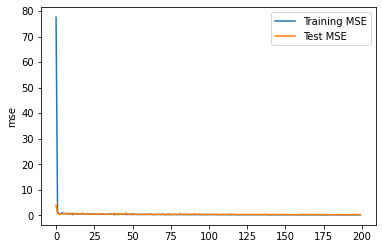

In [28]:
sns.lineplot(y=mse_df['mse'], x=mse_df.index, label='Training MSE')
sns.lineplot(y=mse_df['val_mse'], x=mse_df.index, label='Test MSE')
plt.legend()
plt.show()

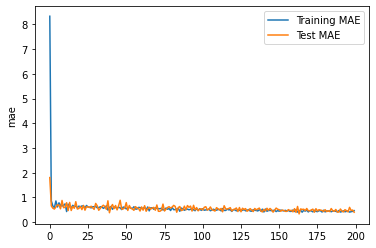

In [29]:
sns.lineplot(y=mse_df['mae'], x=mse_df.index, label='Training MAE')
sns.lineplot(y=mse_df['val_mae'], x=mse_df.index, label='Test MAE')
plt.legend()
plt.show()

Next, do the same but with mean absolute error loss. Use both MSE and MAE as metrics. Compare the results.

In [30]:
# Answer below:
mae_model = build_model(loss='mae', opt='rmsprop')

In [31]:
history = mae_model.fit(X_train_scaled, y_train_log, epochs=200, batch_size=100, 
          validation_data=(X_test_scaled, y_test_log))

Epoch 1/200
9/9 [==============================] - 1s 27ms/step - loss: 11.2409 - mse: 127.8336 - mae: 11.2409 - val_loss: 5.7606 - val_mse: 33.4538 - val_mae: 5.7606
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 3.1862 - mse: 14.9092 - mae: 3.1862 - val_loss: 0.9014 - val_mse: 1.1929 - val_mae: 0.9014
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.8643 - mse: 1.0756 - mae: 0.8643 - val_loss: 0.8333 - val_mse: 0.9725 - val_mae: 0.8333
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 0.7460 - mse: 0.8131 - mae: 0.7460 - val_loss: 0.6792 - val_mse: 0.7236 - val_mae: 0.6792
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6801 - mse: 0.6790 - mae: 0.6801 - val_loss: 0.7252 - val_mse: 0.7410 - val_mae: 0.7252
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6980 - mse: 0.7072 - mae: 0.6980 - val_loss: 0.5650 - val_mse: 0.5228 - val_mae: 0.5650
Epoch 7/200
9/9 [==========

In [32]:
mae_model.evaluate(X_test_scaled, y_test_log)

7/7 [==============================] - 0s 2ms/step - loss: 0.4388 - mse: 0.2857 - mae: 0.4388


[0.4387604892253876, 0.28568610548973083, 0.4387604892253876]

In [33]:
mae_df = pd.DataFrame(history.history)

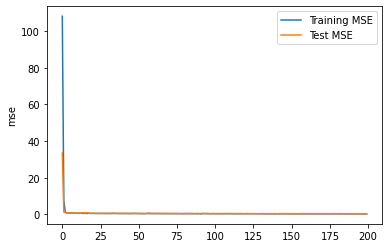

In [34]:
sns.lineplot(y=mae_df['mse'], x=mae_df.index, label='Training MSE')
sns.lineplot(y=mae_df['val_mse'], x=mae_df.index, label='Test MSE')
plt.legend()
plt.show()

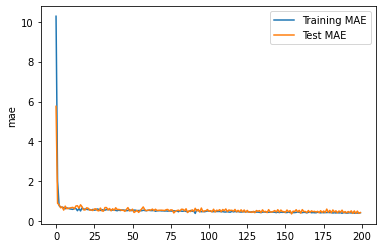

In [35]:
sns.lineplot(y=mae_df['mae'], x=mae_df.index, label='Training MAE')
sns.lineplot(y=mae_df['val_mae'], x=mae_df.index, label='Test MAE')
plt.legend()
plt.show()

Finally, try your model using mean squared logarithmic error. Compare the results.

In [36]:
# Answer below:
msle_model = build_model(loss='msle', opt='rmsprop')

In [37]:
history = msle_model.fit(X_train_scaled, y_train_log, epochs=200, batch_size=100, 
          validation_data=(X_test_scaled, y_test_log))

Epoch 1/200
9/9 [==============================] - 1s 27ms/step - loss: 4.4393 - mse: 127.3645 - mae: 11.2510 - val_loss: 1.0800 - val_mse: 71.6179 - val_mae: 8.4536
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 0.7464 - mse: 55.0553 - mae: 7.3356 - val_loss: 0.1401 - val_mse: 16.5736 - val_mae: 4.0321
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0864 - mse: 10.6448 - mae: 3.1032 - val_loss: 0.0091 - val_mse: 1.3606 - val_mae: 0.9829
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0062 - mse: 0.9282 - mae: 0.7840 - val_loss: 0.0036 - val_mse: 0.5963 - val_mae: 0.6003
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.4647 - mae: 0.5369 - val_loss: 0.0033 - val_mse: 0.5646 - val_mae: 0.5842
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.4695 - mae: 0.5433 - val_loss: 0.0031 - val_mse: 0.5142 - val_mae: 0.5538
Epoch 7/200
9/9 [=========

In [38]:
msle_model.evaluate(X_test_scaled, y_test_log)

7/7 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.3685 - mae: 0.5461


[0.002255886560305953, 0.3685483932495117, 0.5460938811302185]

In [39]:
msle_df = pd.DataFrame(history.history)

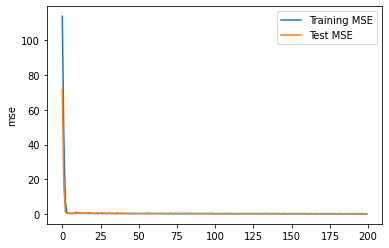

In [40]:
sns.lineplot(y=msle_df['mse'], x=msle_df.index, label='Training MSE')
sns.lineplot(y=msle_df['val_mse'], x=msle_df.index, label='Test MSE')
plt.legend()
plt.show()

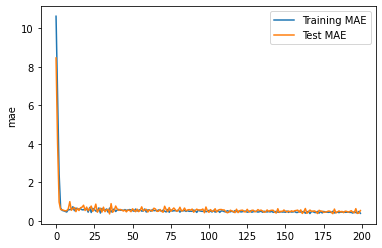

In [41]:
sns.lineplot(y=msle_df['mae'], x=msle_df.index, label='Training MAE')
sns.lineplot(y=msle_df['val_mae'], x=msle_df.index, label='Test MAE')
plt.legend()
plt.show()

# Lecture Notes

In [22]:
def cross_entropy(y, y_pred):
  return -1*(y*np.log(y_pred) + (1-y)*(np.log(1-y_pred)))

# def cross_entropy(y,y_pred):
#   if y==1:
#     return -np.log(y_pred)
#   else:
#     return -np.log(1-y_pred)

In [27]:
cross_entropy(1,.01)

4.605170185988091

In [ ]:
# Sparse Categorical Crossentropy for non-onehotencoded data
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Classification
# Binary
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
model.compile(loss='kullback_leiber_divergence', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Classification
# Multiclass
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_hinge', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Regression
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])

In [29]:
insurance = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/insurance.csv') 

In [31]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
insurance_dummy = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'],
                                 drop_first=True)
insurance_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [34]:
X = insurance_dummy.drop('charges', 1)
y = insurance_dummy['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model = Sequential()

model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [39]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

history = model.fit(X_train, y_train, epochs=1000, batch_size=50, 
          validation_data=(X_test, y_test))

Epoch 1/1000
22/22 [==============================] - 1s 23ms/step - loss: 297025794.0870 - mse: 297025794.0870 - mae: 12695.7021 - val_loss: 355369504.0000 - val_mse: 355369504.0000 - val_mae: 14015.0391
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 324682210.7826 - mse: 324682210.7826 - mae: 13403.3831 - val_loss: 354662688.0000 - val_mse: 354662688.0000 - val_mae: 13991.4912
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 309573211.8261 - mse: 309573211.8261 - mae: 12799.8818 - val_loss: 353505952.0000 - val_mse: 353505952.0000 - val_mae: 13952.9160
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 300487456.0000 - mse: 300487459.4783 - mae: 12623.5379 - val_loss: 351478688.0000 - val_mse: 351478688.0000 - val_mae: 13885.2324
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 333649964.5217 - mse: 333649974.2609 - mae: 13549.5837 - val_loss: 348157952.0000 - val_mse: 348157952.0000 -

In [40]:
model = Sequential()

model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])

history = model.fit(X_train, y_train, epochs=300, batch_size=50, 
          validation_data=(X_test, y_test))

Epoch 1/300
22/22 [==============================] - 1s 10ms/step - loss: 12990.3694 - mse: 311009421.9130 - mae: 12990.3694 - val_loss: 14021.9893 - val_mse: 355580960.0000 - val_mae: 14021.9893
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 13048.3113 - mse: 324216466.0870 - mae: 13048.3113 - val_loss: 14000.0107 - val_mse: 354913184.0000 - val_mae: 14000.0107
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 13348.8678 - mse: 329535194.4348 - mae: 13348.8678 - val_loss: 13966.5205 - val_mse: 353898496.0000 - val_mae: 13966.5205
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 13303.9044 - mse: 329739851.1304 - mae: 13303.9044 - val_loss: 13911.0098 - val_mse: 352224704.0000 - val_mae: 13911.0107
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 12926.0346 - mse: 312276870.9565 - mae: 12926.0346 - val_loss: 13819.8008 - val_mse: 349488416.0000 - val_mae: 13819.8008
Epoch 6/300
22/22 [=====

In [41]:
df = pd.DataFrame(history.history)

In [42]:
df.head()

,loss,mse,mae,val_loss,val_mse,val_mae
0,13079.355469,314311104.0,13079.355469,14021.989258,355580960.0,14021.989258
1,13061.108398,313801664.0,13061.108398,14000.010742,354913184.0,14000.010742
2,13034.560547,313067328.0,13034.560547,13966.520508,353898496.0,13966.520508
3,12991.786133,311868416.0,12991.786133,13911.009766,352224704.0,13911.010742
4,12921.250000,309913792.0,12921.250000,13819.800781,349488416.0,13819.800781


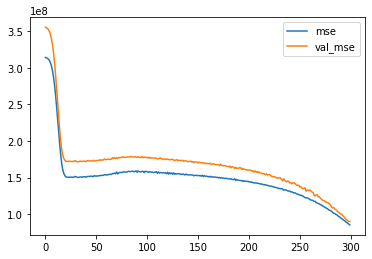

In [44]:
df[['mse', 'val_mse']].plot()

In [46]:
def build_model(loss='mae', optimizer='adam'):
  model = Sequential()

  model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])

  return model

In [47]:
history = build_model(loss='msle').fit(X_train, y_train, epochs=30, batch_size=50, 
          validation_data=(X_test, y_test))

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 44.6144 - mse: 294284967.6522 - mae: 12520.8732 - val_loss: 33.8135 - val_mse: 354955392.0000 - val_mae: 14001.5605
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 31.2947 - mse: 305223713.3913 - mae: 12867.9761 - val_loss: 28.1336 - val_mse: 354324992.0000 - val_mae: 13980.8809
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 26.5621 - mse: 316299770.4348 - mae: 13096.5587 - val_loss: 24.5035 - val_mse: 353653088.0000 - val_mae: 13958.7988
Epoch 4/30
22/22 [==============================] - 0s 3ms/step - loss: 23.2595 - mse: 327757858.7826 - mae: 13296.6402 - val_loss: 21.3035 - val_mse: 352750048.0000 - val_mae: 13929.1191
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 20.1616 - mse: 308006246.9565 - mae: 13038.6097 - val_loss: 18.8099 - val_mse: 351725440.0000 - val_mae: 13895.3672
Epoch 6/30
22/22 [==============================] - 0s 3ms/